In [10]:
# 应用程序
import torch
import torch.nn as nn
from torchsummary import summary
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
# 定义模型类
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # layer 1
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=0 )
        self.batchnorm1 = nn.BatchNorm2d((32))
        self.relu1 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d((2,2))
        # layer 2
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=0)
        self.batchnorm2 = nn.BatchNorm2d((64))
        self.relu2 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d((2,2))
        # layer 3
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=0)
        self.batchnorm3 = nn.BatchNorm2d((128))
        self.relu3 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d((2,2))
        # layer 4
        self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=0)
        self.batchnorm4 = nn.BatchNorm2d((256))
        self.relu4 = nn.ReLU()
        self.pooling4 = nn.MaxPool2d((2,2))
        
        # classifier
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=16384 , out_features=6)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,input):
        # layer 1
        self.conv1_out = self.conv1(input)
        self.batchnorm1_out = self.batchnorm1(self.conv1_out)
        self.relu1_out = self.relu1(self.batchnorm1_out)
        self.pooling1_out = self.pooling1(self.relu1_out)
        
        # layer 2
        self.conv2_out = self.conv2(self.pooling1_out)
        self.batchnorm2_out = self.batchnorm2(self.conv2_out)
        self.relu2_out = self.relu2(self.batchnorm2_out)
        self.pooling2_out = self.pooling2(self.relu2_out)
        
        # layer 3
        self.conv3_out = self.conv3(self.pooling2_out)
        self.batchnorm3_out = self.batchnorm3(self.conv3_out)
        self.relu3_out = self.relu3(self.batchnorm3_out)
        self.pooling3_out = self.pooling3(self.relu3_out)
        
        # layer 4
        self.conv4_out = self.conv4(self.pooling3_out)
        self.batchnorm4_out = self.batchnorm4(self.conv4_out)
        self.relu4_out = self.relu4(self.batchnorm4_out)
        #self.pooling4_out = self.pooling4(self.relu4_out)
        
        
        # classifier
        self.flatten_out = self.flatten(self.relu4_out)
        self.linear_out = self.linear(self.flatten_out)
        self.sigmoid_out = self.sigmoid(self.linear_out)
        
        output = self.sigmoid_out
        
        return output

In [19]:
# 定义模型，实例化类
my_model = MyModel()

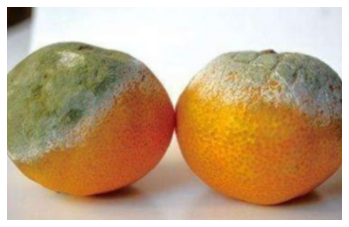

识别结果: rottenoranges


In [25]:
# 输入图片
path = '8.jpg'
input_image = Image.open(path)
# 可视化输入的图片
plt.imshow(input_image)
plt.axis('off')
plt.show()
# 把输入图片转化为Tensor
input_image = torchvision.transforms.ToTensor()(input_image)
input_image = torchvision.transforms.Resize((100,100))(input_image)

# 给 输入图片增加一个维度，这个维度表示其数量,1张
input_image = torch.unsqueeze(input_image,0)

# 加载模型
saved_dict = torch.load('mymodel2.pth')
my_model.load_state_dict(saved_dict)
my_model.eval()
# 输入图片到模型
output = my_model(input_image)
# 取出最大的输出，即预测结果
_,pred = torch.max(output,1)

name = [ 'freshapples','freshbanana','freshoranges','rottenapples','rottenbanana','rottenoranges']
print('识别结果:',name[pred.item()])
